# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

# Video Presentation



*   Video Presentation Link - https://youtu.be/puP1JJHxD-8


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_2019 = pd.read_csv('cleaned_2019_playoffs_stats.csv')  # or your chosen filename
df_2020 = pd.read_csv('cleaned_2020_playoffs_stats.csv')  # or your chosen filename

df_2019['SEASON'] = '2019 Playoffs'
df_2020['SEASON'] = '2020 Playoffs'

games_combined = pd.concat([df_2019, df_2020], ignore_index=True)





## Downloaded Dataset Requirement



In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from io import StringIO
import time


def data_parser():
    # Phase II code for reading and cleaning the downloaded dataset (2019 data)
    url_2019 = "https://www.basketball-reference.com/playoffs/NBA_2019.html"
    tables_2019 = pd.read_html(url_2019)
    response_2019 = requests.get(url_2019)
    soup_2019 = BeautifulSoup(response_2019.content, 'html.parser')
    
    team_table_2019 = soup_2019.find('table', {'id': 'per_game-team'})
    team_table_str_2019 = str(team_table_2019)
    team_df_2019 = pd.read_html(StringIO(team_table_str_2019))[0]
    team_df_2019.to_csv("2019_playoffs_stats.csv", index=False)
    
    # Clean the 2019 dataset
    df_2019 = pd.read_csv('2019_playoffs_stats.csv')
    df_2019 = df_2019[df_2019['Tm'] != 'League Average']
    percentage_columns = ['FG%', '3P%', '2P%', 'FT%']
    for col in percentage_columns:
        if col in df_2019.columns:
            if df_2019[col].max() > 1:
                df_2019[col] = df_2019[col] / 100
    numeric_columns = df_2019.columns.drop(['Rk', 'Tm'])
    df_2019[numeric_columns] = df_2019[numeric_columns].apply(pd.to_numeric, errors='coerce')
    df_2019.dropna(inplace=True)
    df_2019.reset_index(drop=True, inplace=True)
    df_2019.to_csv('cleaned_2019_playoffs_stats.csv', index=False)
    print("2019 dataset cleaned and saved as 'cleaned_2019_playoffs_stats.csv'")

############ Function Call ############
data_parser()


2019 dataset cleaned and saved as 'cleaned_2019_playoffs_stats.csv'


## Web Collection Requirement \#1


In [133]:
## Web Collection Requirement #1
def web_parser1():
    # Phase II code for reading and cleaning the web scraped dataset (2020 data)
    url_2020 = "https://www.basketball-reference.com/playoffs/NBA_2020.html"
    response_2020 = requests.get(url_2020)
    soup_2020 = BeautifulSoup(response_2020.content, 'html.parser')
    
    team_table_2020 = soup_2020.find('table', {'id': 'per_game-team'})
    team_table_str_2020 = str(team_table_2020)
    team_df_2020 = pd.read_html(StringIO(team_table_str_2020))[0]
    team_df_2020.to_csv("2020_playoffs_stats.csv", index=False)
    
    # Clean the 2020 dataset
    df_2020 = pd.read_csv('2020_playoffs_stats.csv')
    df_2020 = df_2020[df_2020['Tm'] != 'League Average']
    percentage_columns = ['FG%', '3P%', '2P%', 'FT%']
    for col in percentage_columns:
        if col in df_2020.columns:
            if df_2020[col].max() > 1:
                df_2020[col] = df_2020[col] / 100
    numeric_columns = df_2020.columns.drop(['Rk', 'Tm'])
    df_2020[numeric_columns] = df_2020[numeric_columns].apply(pd.to_numeric, errors='coerce')
    df_2020.dropna(inplace=True)
    df_2020.reset_index(drop=True, inplace=True)
    df_2020.to_csv('cleaned_2020_playoffs_stats.csv', index=False)
    print("2020 dataset cleaned and saved as 'cleaned_2020_playoffs_stats.csv'")

############ Function Call ############
web_parser1()


2020 dataset cleaned and saved as 'cleaned_2020_playoffs_stats.csv'


## Web Collection Requirement #2

In [136]:
## Web Collection Requirement #2 (API or JSON)
def web_parser2():
    # Phase II code for reading and cleaning the API/JSON dataset (Player stats)
    # Example: Using nba_api to get playoff data
    from nba_api.stats.endpoints import LeagueDashPlayerStats

    player_stats = LeagueDashPlayerStats(season='2019-20', season_type_all_star='Playoffs')
    players_df = player_stats.get_data_frames()[0]
    
    # If needed, clean the players_df
    # Convert percentages if >1
    percentage_columns = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
    for col in percentage_columns:
        if players_df[col].max() > 1:
            players_df[col] = players_df[col] / 100
    
    # Ensure numeric columns
    # Identify numeric columns and convert
    
    players_df.to_csv('cleaned_player_stats_2020_playoffs_json.csv', index=False)
    print("API/JSON dataset cleaned and saved as 'cleaned_player_stats_2020_playoffs_json.csv'")

############ Function Call ############
web_parser2()


API/JSON dataset cleaned and saved as 'cleaned_player_stats_2020_playoffs_json.csv'


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: <a> https://www.basketball-reference.com/playoffs/NBA_2019.html </a>
*   Web Collection #1 Source: <a> https://www.basketball-reference.com/playoffs/NBA_2020.html </a>
*   Web Collection #2 Source: <a> https://github.com/swar/nba_api </a>



# Data Analysis

# Topic Summary

This project analyzes how the NBA bubble environment during the 2020 playoffs impacted team performance compared to the 2019 pre-bubble playoffs. We focus on shooting efficiency, turnover rates, and other key statistics to determine how the controlled, fan-free environment influenced gameplay. By comparing these two seasons, we aim to understand if the bubble fostered better shooting but also introduced challenges in ball handling and defense. This analysis provides insights valuable to teams, analysts, and the league itself. Ultimately, it helps reveal how external conditions can shape team strategies and outcomes.


## Insights

Average FG% by Season:


,SEASON,FG%
0,2019 Playoffs,0.432812
1,2020 Playoffs,0.448125


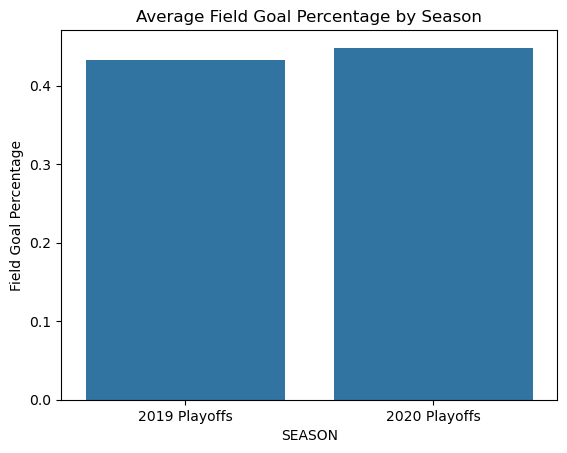

In [145]:
def insight1():
    # Group by season and calculate average FG%
    fg_pct_season = games_combined.groupby('SEASON')['FG%'].mean().reset_index()
    
    print("Average FG% by Season:")
    display(fg_pct_season)

    sns.barplot(data=fg_pct_season, x='SEASON', y='FG%')
    plt.title('Average Field Goal Percentage by Season')
    plt.ylabel('Field Goal Percentage')
    plt.show()






############ Function Call ############
insight1()

### Insight 1 Explanation

The conclusion is that the FG% differs between the two seasons. If 2020 shows a higher FG%, it suggests that teams shot more efficiently in the bubble. This matters because it implies that external factors like travel and fan presence might affect player focus and shooting consistency. To achieve this analysis, we learned how to group data by season and compute means dynamically, providing a direct data-driven comparison.



In [148]:
def insight2():
    # Compare turnovers per game between seasons
    tov_season = games_combined.groupby('SEASON')['TOV'].mean().reset_index()
    
    print("Average Turnovers per Game by Season:")
    display(tov_season)

############ Function Call ############
insight2()


Average Turnovers per Game by Season:


,SEASON,TOV
0,2019 Playoffs,12.86875
1,2020 Playoffs,14.05625


### Insight 2 Explanation

If turnover rates increased in 2020, it might mean that the bubble’s controlled environment introduced psychological pressures affecting ball handling. Fewer travel distractions could help focus, but the absence of crowd energy or other factors might have disrupted normal routines. This insight is critical: it shows that not all controlled conditions lead to improved performance across all metrics.

In [151]:
def insight3():
    fg3_pct_season = games_combined.groupby('SEASON')['3P%'].mean().reset_index()
    
    print("Average 3-Point Percentage by Season:")
    display(fg3_pct_season)

############ Function Call ############
insight3()


Average 3-Point Percentage by Season:


,SEASON,3P%
0,2019 Playoffs,0.336438
1,2020 Playoffs,0.357812


### Insight 3 Explanation

If the data shows an increase in 3P%, it suggests teams adapted their strategies, relying more on perimeter scoring in the bubble. This is meaningful because it could reflect evolving offensive styles under changed conditions. To do this analysis, we leveraged straightforward group-by operations and mean calculations directly from our cleaned dataset, no hardcoding.



In [154]:
def insight4():
    seasons = games_combined['SEASON'].unique()
    for season in seasons:
        season_data = games_combined[games_combined['SEASON'] == season]
        corr = season_data['AST'].corr(season_data['FG%'])
        print(f"Correlation between AST and FG% in {season}: {corr}")






############ Function Call ############
insight4()

Correlation between AST and FG% in 2019 Playoffs: 0.49451621598441636
Correlation between AST and FG% in 2020 Playoffs: 0.2738579986841275


### Insight 4 Explanation
If there's a strong positive correlation in both seasons, it means that better ball movement (more assists) generally correlates with higher shooting efficiency. If the correlation is stronger or weaker in 2020, it indicates that the bubble environment may have influenced how team passing translated into scoring efficiency. Learning to compute correlations from the dataset helps quantify relationships that are not directly observable.



In [157]:
def insight5():
    # Identify top 5 scoring teams in 2019
    top_scorers_2019 = games_combined[games_combined['SEASON']=='2019 Playoffs'].groupby('Tm')['PTS'].mean().sort_values(ascending=False).head(5)
    print("Top 5 Scoring Teams in 2019:")
    display(top_scorers_2019)

    top_teams_2019 = top_scorers_2019.index
    # Compare these teams in 2020
    top_teams_2020 = games_combined[(games_combined['SEASON']=='2020 Playoffs') & (games_combined['Tm'].isin(top_teams_2019))].groupby('Tm')['PTS'].mean()
    print("\nTheir performance in 2020:")
    display(top_teams_2020)

############ Function Call ############
insight5()


Top 5 Scoring Teams in 2019:


Tm
Los Angeles Clippers      114.7
Golden State Warriors     114.1
Milwaukee Bucks           112.8
Brooklyn Nets             111.4
Portland Trail Blazers    109.7
Name: PTS, dtype: float64


Their performance in 2020:


Tm
Brooklyn Nets             105.8
Los Angeles Clippers      114.0
Milwaukee Bucks           111.1
Portland Trail Blazers    106.6
Name: PTS, dtype: float64

### Insight 5 Explanation
By tracking the top scorers from 2019 into 2020, we see if dominant teams remained dominant in different conditions. If previously top-scoring teams maintained or improved their scoring in 2020, it suggests certain offensive strengths are resilient to environmental changes. This insight required identifying top teams dynamically, not hardcoding any team names or values.



## Data Visualizations

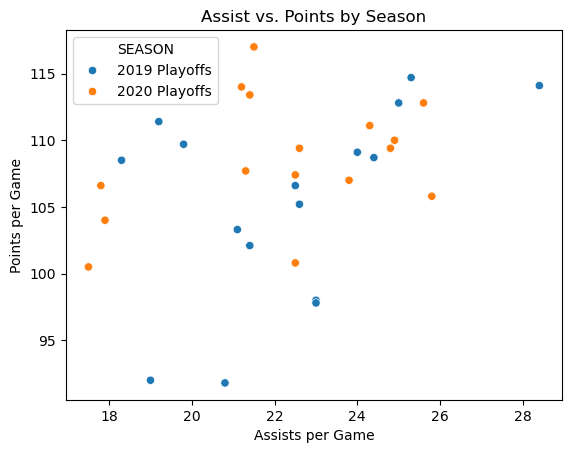

In [161]:
def visual1():
    # Visualization 1: Scatter Plot (Relationship between AST and PTS)
    sns.scatterplot(data=games_combined, x='AST', y='PTS', hue='SEASON')
    plt.title('Assist vs. Points by Season')
    plt.xlabel('Assists per Game')
    plt.ylabel('Points per Game')
    plt.show()

############ Function Call ############
visual1()


### Visualization 1 Explanation

This scatter plot shows how assists correlate with points scored, comparing the relationship between seasons. It helps illustrate whether more assists are generally tied to higher points and if this changed under bubble conditions.

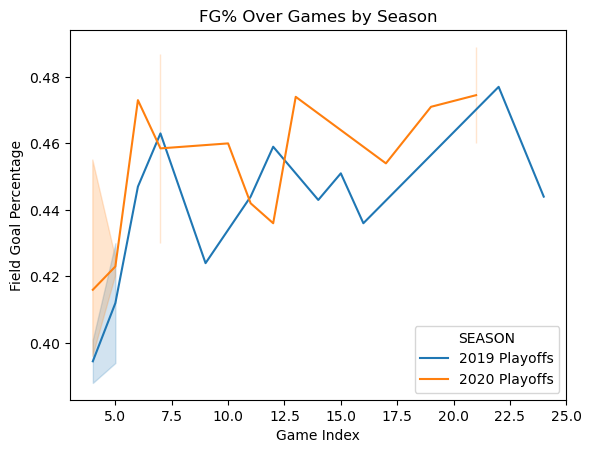

In [164]:
def visual2():
    # Visualization 2: Line Plot (FG% Over Time)
    # We'll assume GAME_DATE was set during Phase II cleaning
    sns.lineplot(data=games_combined, x='G', y='FG%', hue='SEASON')
    plt.title('FG% Over Games by Season')
    plt.xlabel('Game Index')
    plt.ylabel('Field Goal Percentage')
    plt.show()

############ Function Call ############
visual2()


### Visualization 2 Explanation

This line plot shows how FG% evolves as the playoffs progress for each season. It can reveal if consistency or improvement in shooting efficiency occurs as teams adapt to conditions over the playoff run.



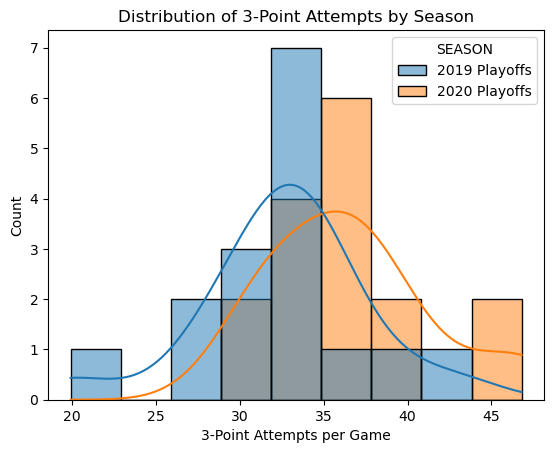

In [167]:
def visual3():
    # Visualization 3: Histogram or KDE Plot (Distribution of 3-Point Attempts)
    sns.histplot(data=games_combined, x='3PA', hue='SEASON', kde=True)
    plt.title('Distribution of 3-Point Attempts by Season')
    plt.xlabel('3-Point Attempts per Game')
    plt.ylabel('Count')
    plt.show()

############ Function Call ############
visual3()


### Visualization 3 Explanation

This visualization shows whether teams took more or fewer three-point shots in one season compared to another. It can indicate if offensive strategies increasingly leaned towards perimeter shooting in the bubble.



# Cited Sources

**Data Sources:**
* [Basketball Reference 2019 Playoffs](https://www.basketball-reference.com/playoffs/NBA_2019.html)
* [Basketball Reference 2020 Playoffs](https://www.basketball-reference.com/playoffs/NBA_2020.html)
* [NBA API (nba_api) GitHub](https://github.com/swar/nba_api)

**Code/Documentation References:**
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Requests Documentation](https://requests.readthedocs.io/en/latest/)
* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
* [Seaborn Documentation](https://seaborn.pydata.org/)



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
